## Analiza Guinnessovih Svetovnih Rekordov

V tem projektu bomo analizirali podatke, povezane z Guinnessovimi svetovnimi rekordi.
Cilj je raziskati porazdelitev rekordov po kategorijah, njihovo geografsko razširjenost in časovne trende.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline
plt.style.use("seaborn-v0_8")

rekordi = pd.read_csv("guinness_rekordi.csv")

print(f"Število vnosov: {len(rekordi)}.")

Število vnosov: 53.


### Pregled podatkov

Spodaj je prvih pet vnosov, ki nam pokažejo, katere podatke o rekordih smo zbrali.


In [10]:
display(rekordi.head())


,naslov,opis,kategorija,leto,lokacija,tip,url
0,Longest reef,"The Great Barrier Reef off Queensland, north-e...",nature,1962,United Kingdom,longest,https://www.guinnessworldrecords.com/world-rec...
1,Most dangerous ant,The most dangerous ant in the world is the bul...,nature,1936,United Kingdom,most,https://www.guinnessworldrecords.com/world-rec...
2,Most dangerous tree,"A member of the spurge family, the world’s mos...",nature,2011,USA,most,https://www.guinnessworldrecords.com/world-rec...
3,Tallest waterfall,"The tallest waterfall is Kerepakupai Merú, aka...",nature,1956,United Kingdom,tallest,https://www.guinnessworldrecords.com/world-rec...
4,Largest mammal to build a nest,The largest mammal to construct a nest is the ...,nature,2004,United Kingdom,largest,https://www.guinnessworldrecords.com/world-rec...


### Analiza po kategorijah

Zanima nas, kako so rekordi porazdeljeni med različnimi kategorijami. 

Kategorija,Vrednost
human_body,21
gaming,18
nature,14


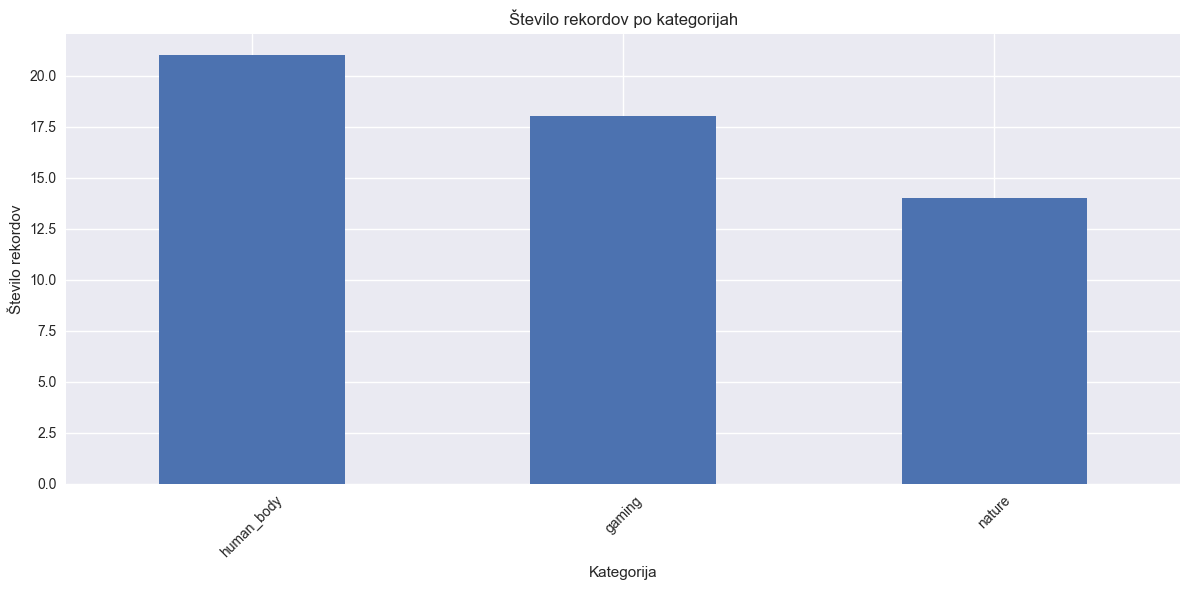

In [11]:
kategorije = rekordi["kategorija"].value_counts()

tabela_kategorij = pd.DataFrame({
   "Kategorija": [kat[0] for kat in kategorije.items()],
   "Vrednost": [kat for kat in kategorije]
})
tabela_kategorij = tabela_kategorij.reset_index(drop=True)

display(tabela_kategorij.style.hide(axis="index"))

plt.figure(figsize=(12, 6))
kategorije.plot(kind="bar")
plt.title("Število rekordov po kategorijah")
plt.xlabel("Kategorija")
plt.ylabel("Število rekordov")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analiza po letih

Zanima nas, koliko novih rekordov je bilo zabeleženih vsako leto.


Obdobje s podatki: 1936 - 2023
Leto z največ rekordi: 2019 (6 rekordov)
Število let z najmanj enim rekordom: 29 od 88 možnih


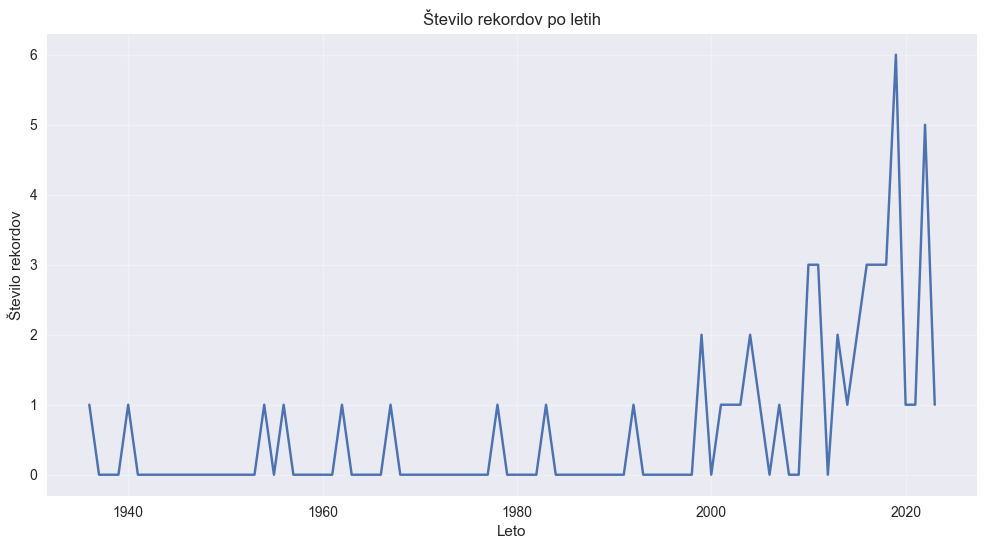

In [12]:
# Celica 5: Časovna analiza
"""
## Analiza po letih

Zanimivo bi bilo pogledati, v katerih letih je bilo ustanovljenih največ rekordov. 
Domnevam, da bo število rekordov sčasoma naraščalo.
"""

leto_data = rekordi[rekordi['leto'] != 'Neznano'].copy()
leto_data['leto'] = pd.to_numeric(leto_data['leto'], errors='coerce')
leto_data = leto_data.dropna(subset=['leto'])

if not leto_data.empty:
    # Ustvarimo popolno območje let od najzgodnejšega do najnovejšega
    min_leto = int(leto_data['leto'].min())
    max_leto = int(leto_data['leto'].max())
    vsa_leta = pd.Series(range(min_leto, max_leto + 1))
    
    # Preštejemo rekorde po letih in dopolnimo z ničlami za manjkajoča leta
    letno_stetje = leto_data['leto'].value_counts().sort_index()
    popolno_stetje = letno_stetje.reindex(vsa_leta, fill_value=0)
    
    print(f"Obdobje s podatki: {min_leto} - {max_leto}")
    print(f"Leto z največ rekordi: {letno_stetje.idxmax()} ({letno_stetje.max()} rekordov)")
    print(f"Število let z najmanj enim rekordom: {len(letno_stetje)} od {len(popolno_stetje)} možnih")
    
    plt.figure(figsize=(12, 6))
    popolno_stetje.plot(kind='line')
    plt.title('Število rekordov po letih')
    plt.xlabel('Leto')
    plt.ylabel('Število rekordov')
    plt.grid(True, alpha=0.3)
    plt.show()
    
else:
    print("Ni podatkov o letih za analizo")

### Analiza po lokacijah

Zanima nas, iz katerih držav oz. regij prihaja največ rekordov. 

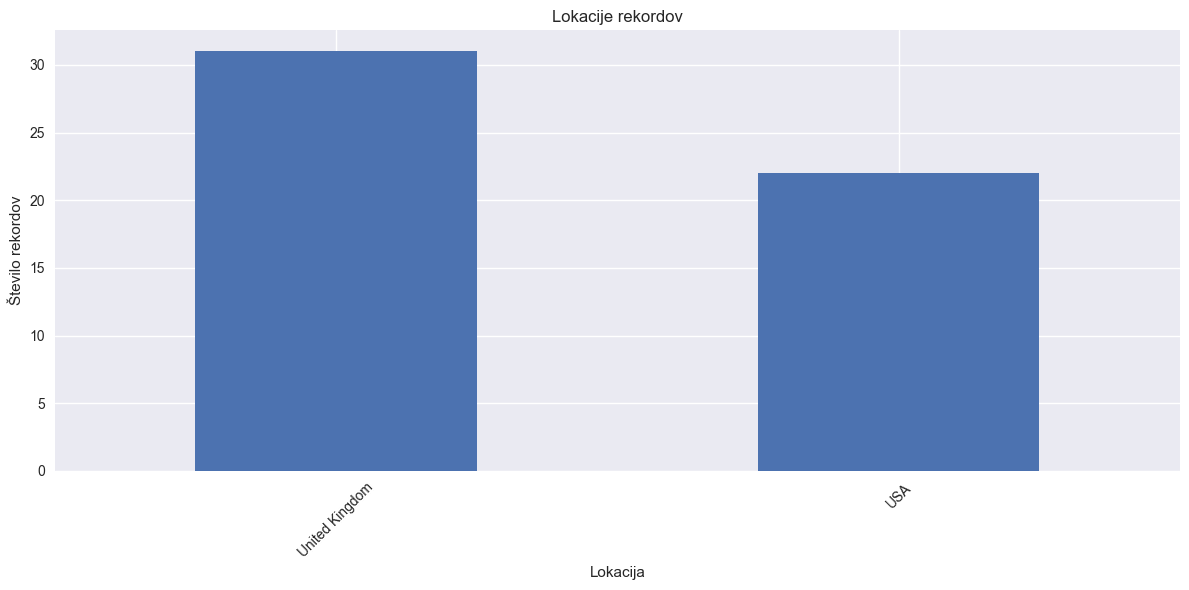

Očitno, so meritve rekordov izvajali le v Veliki Britaniji in v ZDA.


In [13]:
lokacije_count = rekordi["lokacija"].value_counts()

plt.figure(figsize=(12, 6))
lokacije_count.head(10).plot(kind="bar")
plt.title("Lokacije rekordov")
plt.xlabel("Lokacija")
plt.ylabel("Število rekordov")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Očitno, so meritve rekordov izvajali le v Veliki Britaniji in v ZDA.")



### Analiza tipov rekordov

Rekorde lahko razvrstimo glede na tip dosežka - na primer največji, najhitrejši, 
najdaljši itd. Zanima nas, katere vrste rekordov so najpogostejše.


Tip rekorda,Število
most,11
largest,9
tallest,6
other,6
longest,4
heaviest,4
highest,3
youngest,3
fastest,2
shortest,2


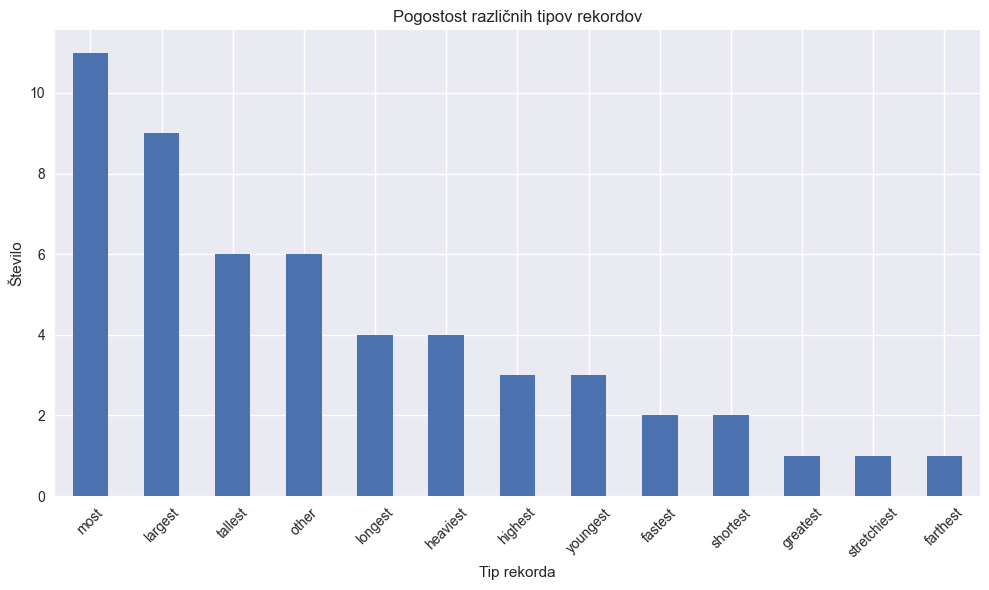

In [14]:
tipi_count = rekordi["tip"].value_counts()

tabela_tipov = pd.DataFrame({
    "Tip rekorda": [tip[0] for tip in tipi_count.items()],
    "Število": [stevilo[1] for stevilo in tipi_count.items()]
})
tabela_tipov = tabela_tipov.reset_index(drop=True)
display(tabela_tipov.style.hide(axis="index"))

plt.figure(figsize=(10, 6))
tipi_count.plot(kind="bar")
plt.title("Pogostost različnih tipov rekordov")
plt.xlabel("Tip rekorda")
plt.ylabel("Število")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analiza dolžine naslovov

Analiziramo lahko tudi dolžino naslovov rekordov.


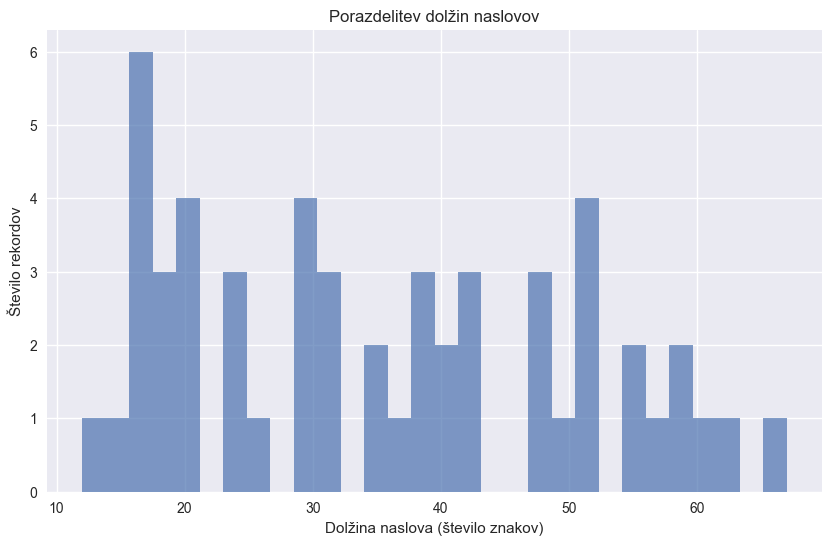

Povprečna dolžina naslova: 35.3 znakov
Najdaljši naslov: 67 znakov
Najkrajši naslov: 12 znakov


In [15]:
rekordi["dolzina_naslova"] = rekordi["naslov"].str.len()

plt.figure(figsize=(10, 6))
plt.hist(rekordi["dolzina_naslova"].dropna(), bins=30, alpha=0.7)
plt.title("Porazdelitev dolžin naslovov")
plt.xlabel("Dolžina naslova (število znakov)")
plt.ylabel("Število rekordov")
plt.show()

print(f"Povprečna dolžina naslova: {rekordi['dolzina_naslova'].mean():.1f} znakov")
print(f"Najdaljši naslov: {rekordi['dolzina_naslova'].max()} znakov")
print(f"Najkrajši naslov: {rekordi['dolzina_naslova'].min()} znakov")

### Korelacija med kategorijami in lokacijami

Opazujemo lahko, kako pogosto se določene kategorije rekordov pojavljajo v ZDA oziroma v Združenem kraljestvu.


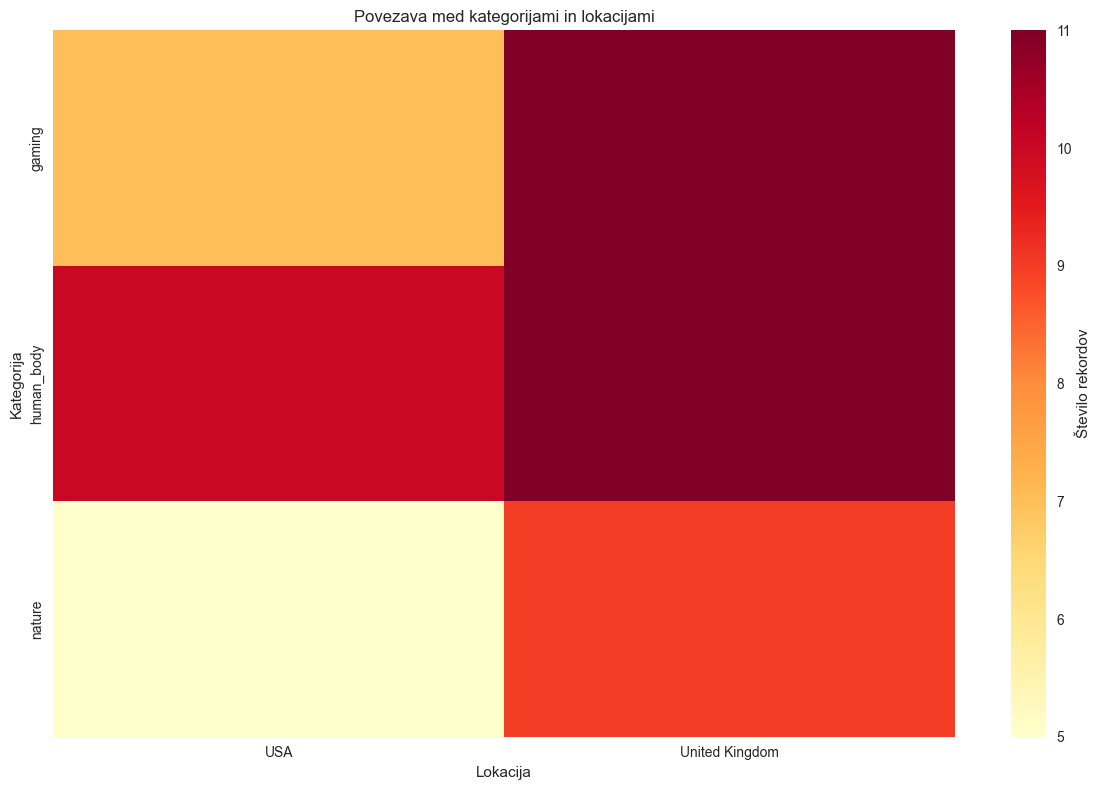

In [16]:
cross_tab = pd.crosstab(rekordi["kategorija"], rekordi["lokacija"])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="YlOrRd", cbar_kws={"label": "Število rekordov"})
plt.title("Povezava med kategorijami in lokacijami")
plt.xlabel("Lokacija")
plt.ylabel("Kategorija")
plt.tight_layout()
plt.show()